In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ridge Regresyon

amaç : hata kareler toplamını minimize eden katsayıları, öncekilerden farklı olarak bu katsayıları bir ceza(alpha) uygulayarak bulmaktır

Over-fittinge karşı dirençlidir.

Çok boyutluluğa çözüm sunar.

Tüm değişkenler ile model kurar, ilgisiz değişkenleri çıkarmaz sadece katsayılarını sıfıra yaklaştırır.

bağımsız değişkenlerim arasında yüksek korelasyon oldugunda etkilidir

lambda ayar parametremiz

lambda 0 oldugunda en küçük kareler toplamının oldugu yerdir

amacımız öyle bir lamdbda değeri bulmalıyız ki Hata Karaler Toplamım mimimum olsun

lambda için bir değer kümesi seçilir ve herbiiri için cv hatası hesaplanır

en küçük cv veren lambda ayar parametresi olarak seçilir

Son olarak seçilen bu lambda değeri tüm gözlemlere fit edilir

 # Ridge Regresyon model

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv("Hitters.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [39]:
df= df.dropna()

In [40]:
df.head().T

,1,2,3,4,5
AtBat,315,479,496,321,594
Hits,81,130,141,87,169
HmRun,7,18,20,10,4
Runs,24,66,65,39,74
RBI,38,72,78,42,51
Walks,39,76,37,30,35
Years,14,3,11,2,11
CAtBat,3449,1624,5628,396,4408
CHits,835,457,1575,101,1133
CHmRun,69,63,225,12,19


In [41]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
# kategorik değişkenlerin  sayısal anlamda dönüştürülmesi gerekmektedir.

In [42]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [9]:
y = df["Salary"]

In [10]:
X_ = df.drop(["Salary","League","Division","NewLeague"],axis =1).astype("float64") 
# bağımlı ve kategorik değişkenleri veri setinden çıkardım

In [11]:
X = pd.concat([X_ , dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
# dummy ve bağımsız değişkenleri bir araya getirip bağımsız değişkenlerimin nihai halini oluşturmuş oldum

In [12]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [14]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


<AxesSubplot:>

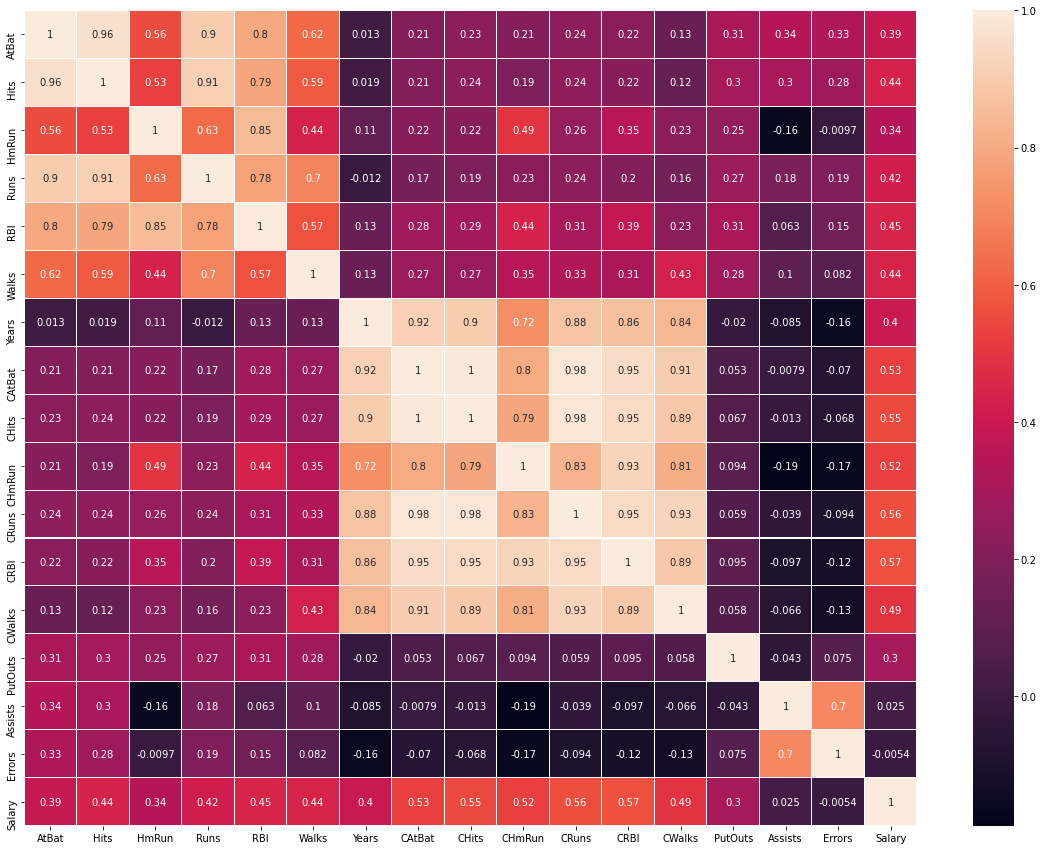

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True,linewidths=0.05)
# salary değişkenini diğer bağımsız değişkenler ile tahmin etmeye calışıyorum

# ridge model

In [23]:
ridge_model = Ridge(alpha=1.0).fit(X_train,y_train)

In [26]:
ridge_model

Ridge()

In [28]:
ridge_model.intercept_

-4.082384716973593

In [27]:
ridge_model.coef_

# farklı lambda değerlerine karşılık farklı katsayılar oluşacak ve her farklı lambda değeri ile oluşan katsayılar üzerinden
# kurulan modeller ve bunların neticesinde ortaya cıkan hatalar incelenecek
# buna gore optimum lambda yani alphaya karar verilecek

array([ -1.7833362 ,   8.82281559,   7.26631498,  -3.33050119,
        -2.07091307,   5.42111154,   7.50977607,  -0.13557983,
        -0.21962511,  -0.63033482,   1.7974231 ,   0.73919181,
        -0.68443562,   0.26159973,   0.26762087,  -0.48054311,
       102.20055186, -97.88649765, -38.9216579 ])

soru : farklı lambda değerlerine karşı katsayıların değişimi nasıl olur ? 
    

In [30]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 #rastgele sayılar oluşturdum

In [31]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

bu noktadan sonra amaç şu :
    bir yöntem ile oluşturduğumuz lambda değerlerine karşı katsayılar nasıl değişir

In [34]:
ridge_model = Ridge()
katsayılar = []

for i in lambdalar : # hiperparametreler
    ridge_model.set_params(alpha = i ) # her yakalamış oldugu alpha nesnesini Ridge'e alpha parametresi olarak atayacak
    ridge_model.fit(X_train, y_train)
    katsayılar.append(ridge_model.coef_) # her alpha değerine karşılık gelecek olan katsayıları topladım
                                         # her lambdanın bağımsız değişken kadar katsayısı olacak

In [35]:
katsayılar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

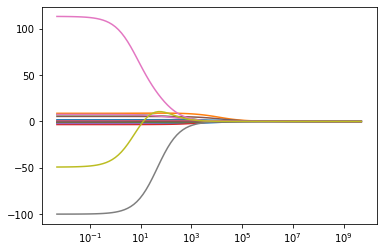

In [43]:
# bu değerleri gözlemlemek adına 
ax = plt.gca()
ax.plot(lambdalar,katsayılar) # herbir lambdaya karşılık katsayıların nasıl oluştugunu gözlemliyeceğiz
ax.set_xscale("log") # hepsini gözlemleyebilmek adına logaritmik bir dönüüşüm yaptık

sonuç : farklı lambda değerlerline karşılık elimizdeki katsayıların nasıl değiştiğini görmüş olduk
    grafikte de görüldüğü üzere anlamsız parametreleri 0 a yaklaştırdıgını gormuş olduk 

# ridge tahmin

In [45]:
ridge_model # yukarıda atama yaptıgımız ıcın lambda degerımız 0,005

Ridge(alpha=0.005)

In [49]:
ridge_model = Ridge().fit(X_train,y_train) # şu an sıfırladım

In [50]:
ridge_model # alphanın 0 oldugunu gordum

Ridge()

In [51]:
y_pred = ridge_model.predict(X_train)

In [53]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [56]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [57]:
# hatalarımızı görelim

In [60]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred)) # train hatası

In [62]:
RMSE

289.34470696006565

In [64]:
from sklearn.model_selection import cross_val_score

In [66]:
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train, y_train, cv = 10, scoring ="neg_mean_squared_error"  )))

351.39315856063735

In [ ]:
# 61 ve 66.satırlarda hata değerlerini aldık;
    # 66. satırda aldıgım hatanın daha küçük olması demek iyi sonuç aldığğımı göstermez
    # 2. kısımda daha doğru hata aldık

In [71]:
# test hatası
y_pred = ridge_model.predict(X_test)

In [72]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [73]:
RMSE

356.8082905730233

# model tuning

neden model tuning?

optimum lambda değerini bulup final modelimi oluşturmak için tuned ediyoruz

In [75]:
ridge_model = Ridge(100).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

# ridgedeki lambda hangi değeri alırsa minimum değeri verir biz bunu bilmiyoruz
# işte bunu deneme yanılma yoluyla farklı farklı varyasyonları denemek şeklinde gerçekleştirmek istediğimizde,
# modelleri hiperparametre açısından ayarlamış (tune) etmiş oluyoruz
# en uygun parametre değerini bulmuş oluyoruz

357.8154668279844

In [77]:
lambdalar1 = np.random.randint(0,1000,100)

In [78]:
lambdalar1

array([355, 628,  97, 693, 832, 564, 943, 405, 292, 887, 769, 164, 682,
       221, 530, 274,  11, 398, 557,  26, 621, 311, 581, 189,  45, 599,
       236, 798, 357, 606, 718, 806, 367, 863, 290,  45, 488, 868, 509,
       298, 518, 147, 164,  44, 107,  58, 266, 294, 776, 105, 640, 459,
       550, 612, 694, 887, 551, 863, 408, 643, 924, 232, 383, 456, 689,
       867, 140, 608, 928, 799, 899, 784, 923, 523,  56, 965, 349, 907,
       867, 414, 996, 114, 510, 512, 390, 258, 912, 907, 371, 760, 628,
       496, 575, 707, 161, 668, 766, 909,  77, 374])

In [80]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [82]:
lambdalar2[0:5] # farklı lambda değerlerine karşılık katsayıların hatalarını inceleyeceğiz

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [83]:
ridgecv = RidgeCV(alphas =  lambdalar2,
                            scoring="neg_mean_squared_error",
                            cv = 10,
                            normalize = True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [84]:
ridgecv.alpha_ # optimum alpha değerimi bulmuş oldum

0.7599555414764666

In [85]:
# final modeli


In [87]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)

In [88]:
ridge_tuned

Ridge(alpha=0.7599555414764666)

In [89]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) #final test hatamız

356.85830472715116

In [90]:
ridgecv = RidgeCV(alphas =  lambdalar1, #lambdalar 1 olarak deeneyelim bir de
                            scoring="neg_mean_squared_error",
                            cv = 10,
                            normalize = True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([355, 628,  97, 693, 832, 564, 943, 405, 292, 887, 769, 164, 682,
       221, 530, 274,  11, 398, 557,  26, 621, 311, 581, 189,  45, 599,
       236, 798, 357, 606, 718, 806, 367, 863, 290,  45, 488, 868, 509,
       298, 518, 147, 164,  44, 107,  58, 266, 294, 776, 105, 640, 459,
       550, 612, 694, 887, 551, 863, 408, 643, 924, 232, 383, 456, 689,
       867, 140, 608, 928, 799, 899, 784, 923, 523,  56, 965, 349, 907,
       867, 414, 996, 114, 510, 512, 390, 258, 912, 907, 371, 760, 628,
       496, 575, 707, 161, 668, 766, 909,  77, 374]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [91]:
ridgecv.alpha_ # optimum alpha değerimi 11 .ıktı aralarında çok fark oldugunu gördüm

11

In [92]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) # final test hatalarımız birbirine yakın çıktı

356.85830472715116

# Lasso Regresyon

amaç: Ridge ile aynıdır


l1 olarak adlandırılır


l2 Ridge için kullanılır


alpha değerimiz burda da vardır

Fakat ridge regresyondan farklı olarak ilgisiz değişkenlerin katsayılarını sıfıra eşitler.**

# lasso model

In [94]:
from sklearn.linear_model import Lasso, LassoCV

In [95]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [97]:
df.shape

(263, 20)

In [99]:
lasso_model = Lasso().fit(X_train,y_train)

C:\Users\APO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850398, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


In [100]:
lasso_model 

Lasso()

In [101]:
lasso_model.intercept_ # sabiti aldık

-5.587450677334914

In [102]:
lasso_model.coef_ # katsayılarımız

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [103]:
# farklı lambda değerlerine karşılık katsayılar


In [115]:
lasso = Lasso()
coefs =[]
alphas = np.random.randint(0,1000000,10)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

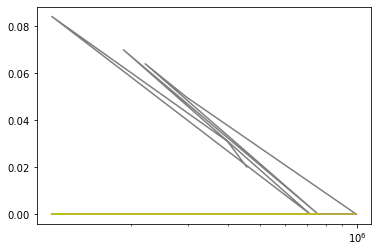

In [116]:
# bu değerleri gözlemlemek adına 
ax = plt.gca()
ax.plot(alphas,coefs) # herbir lambdaya karşılık katsayıların nasıl oluştugunu gözlemliyeceğiz
ax.set_xscale("log") # hepsini gözlemleyebilmek adına logaritmik bir dönüüşüm yaptık

sonuç : ridge görselinde  hatırlayacağımız üzere değerlerim 0'a yaklaşıyor ancak eşitlenmiyordu
    burada görüldüğü gibi değerlerimi 0'a çekti

# lasso tahmin 

In [117]:
lasso_model

Lasso()

In [118]:
lasso_model.predict(X_train)[0:5]
 # tahminlerimi gerçekleştirdim train datasetinde

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [120]:
lasso_model.predict(X_test)[0:5]
 # tahminlerimi gerçekleştirdim test datasetinde

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [121]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) # optimize edilmemiş modelin test hatası

356.09758845540335

In [122]:
r2_score(y_test,y_pred) # bagımsız değişkence bağımlı değişkendeki değişkenliğin açıklanma yüzdesi

0.4142279813236617

# lasso model tuning

In [146]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [147]:
lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train,y_train)

In [148]:
lasso_cv_model.alpha_

201.85086292982749

In [149]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [150]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [151]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) # alpha değeri vermedik

363.6832708037448

In [152]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon

Amaç ridge ve lasso regresyon ile aynıdır ama elastic net, ridge ve lasso regresyonu birleştirir.

 Ridge regresyon tarzı cezalandırma ve lasso regresyon tarzında değişken seçimi yapar.

# elastic model

In [153]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [154]:
enet_model = ElasticNet().fit(X_train,y_train)

C:\Users\APO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367327, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


In [155]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [156]:
enet_model.intercept_

-6.465955602112331

# tahmin ve model

In [157]:
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [159]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [162]:
y_pred = enet_model.predict(X_test)

In [163]:
np.sqrt(mean_squared_error(y_test,y_pred)) #test hatası

357.1676548181245

In [164]:
r2_score(y_test,y_pred)

0.4107022246932689

# model tuning

In [165]:
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)

In [166]:
enet_cv_model.alpha_

5230.7647364798695

In [167]:
enet_cv_model.intercept_

-38.5194055839429

In [168]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

# final model

In [170]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [171]:
y_pred = enet_tuned.predict(X_test)


In [172]:
np.sqrt(mean_squared_error(y_test,y_pred)) #test seti hatamız 

394.1528056321879

In [173]:
?ElasticNet